# **TOPIC MODELING**

Topic modeling is one of unsupervised learning tasks. 


Topic modeling is able to capture hidden semantic structure in a document. 


The basic assumption is that each document is composed by a mixture of topics and a topics consist of a set of words

Topic analysis uses natural language processing (NLP) to break down human language so that you can find patterns and unlock semantic structures within texts to extract insights and help make data-driven decisions.

Topic modeling involves counting words and grouping similar word patterns to infer topics within unstructured data.

Document is whatever you define a single observation (a.k.a. a single bag of words) to be. It can range from a single sentence to a whole article or even an entire book — how you define it will be determined by the objective of your analysis.
Corpus is the totality of all your text data — or in other words, all the documents in your dataset.

# **Latent Dirichlet Allocation** Approach


**Latent Dirichlet Allocation** (LDA) is an example of topic model and is used to classify text in a document to a particular topic. It builds a topic per document model and words per topic model, modeled as Dirichlet distributions.

The purpose of LDA is mapping each document in our corpus to a set of topics which covers a good deal of the words in the document.

**IMPORTING LIBRARIES AND DEPENDENCIES**

In [1]:
import re
import string
import spacy
import nltk
import sklearn
import sys
import nltk
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

import gensim.corpora
from gensim.parsing.preprocessing import remove_stopwords
from gensim.models import ldamodel
from gensim.models import LdaModel
from gensim.corpora import Dictionary

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
lmtzr = WordNetLemmatizer()
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem.wordnet import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

nlp = spacy.load("en_core_web_sm")

import pyLDAvis.gensim
import warnings
from itertools import chain
warnings.filterwarnings('ignore')

**READING RESUME DATASET**

In [2]:
data = pd.read_csv("resume_dataset.csv")
data.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad..."


**DATA CLEANING**

In [3]:
#printing the sume of null values of dataframe
print (data['Category'].isnull().sum())
print (data['Resume'].isnull().sum())

0
0


In [4]:
data['Category'].value_counts()

Java Developer               14
Database                     11
HR                           11
Data Science                 10
Advocate                     10
Testing                       7
Automation Testing            7
DotNet Developer              7
DevOps Engineer               7
Hadoop                        7
Business Analyst              6
Health and fitness            6
Arts                          6
Python Developer              6
SAP Developer                 6
Civil Engineer                6
Electrical Engineering        5
ETL Developer                 5
Web Designing                 5
Network Security Engineer     5
Blockchain                    5
Mechanical Engineer           5
Sales                         5
Operations Manager            4
PMO                           3
Name: Category, dtype: int64

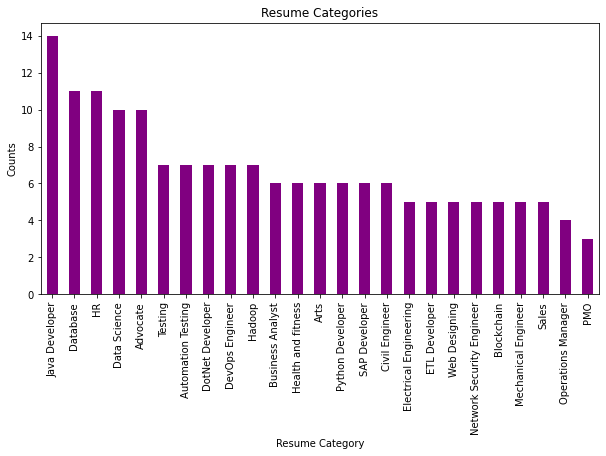

In [5]:
data["Category"].value_counts().plot(kind='bar', figsize = ((10,5)), color = 'purple',title='Resume Categories')
plt.xlabel("Resume Category")
plt.ylabel("Counts")
plt.show()

In [6]:
def clean(text):
    regex = re.compile('[' + re.escape(string.punctuation) + '0-9\\r\\t\\n]')
    text = regex.sub(" ", text.lower())
    words = text.split(" ")
    words = [re.sub('\S*@\S*\s?', '', sent) for sent in words]
    words = [re.sub('\s+', ' ', sent) for sent in words]
    words = [re.sub("\'", "", sent) for sent in words]
    words = [w for w in words if not len(w) < 2]
    words = [lmtzr.lemmatize(w) for w in words]
    
    return words

**Topic Modeling**

In [7]:
docs = [clean(x) for x in data['Resume']]

In [8]:
docs

[['skill',
  'programming',
  'language',
  'python',
  'panda',
  'numpy',
  'scipy',
  'scikit',
  'learn',
  'matplotlib',
  'sql',
  'java',
  'javascript',
  'jquery',
  'machine',
  'learning',
  'regression',
  'svm',
  'naã¯ve',
  'bayes',
  'knn',
  'random',
  'forest',
  'decision',
  'tree',
  'boosting',
  'technique',
  'cluster',
  'analysis',
  'word',
  'embedding',
  'sentiment',
  'analysis',
  'natural',
  'language',
  'processing',
  'dimensionality',
  'reduction',
  'topic',
  'modelling',
  'lda',
  'nmf',
  'pca',
  'neural',
  'net',
  'database',
  'visualization',
  'mysql',
  'sqlserver',
  'cassandra',
  'hbase',
  'elasticsearch',
  'j',
  'dc',
  'j',
  'plotly',
  'kibana',
  'matplotlib',
  'ggplot',
  'tableau',
  'others',
  'regular',
  'expression',
  'html',
  'cs',
  'angular',
  'logstash',
  'kafka',
  'python',
  'flask',
  'git',
  'docker',
  'computer',
  'vision',
  'open',
  'cv',
  'and',
  'understanding',
  'of',
  'deep',
  'learning

**Creating a Dictionary**

In [9]:
# For each document, create a dictionary reporting how many words and how many times those words appear

dictionary = Dictionary(docs)
print('Number of unique words in initital documents:', len(dictionary))

Number of unique words in initital documents: 6832


In [10]:
# Filtering out words that occur less than 10 documents, or more than 20% of the documents.
dictionary.filter_extremes(no_below=10, no_above=0.2)
print('Number of unique words after removing rare and common words:', len(dictionary))

Number of unique words after removing rare and common words: 507


**Creating a corpus from Dictionary**

In [11]:
corpus = [dictionary.doc2bow(doc) for doc in docs]
print(len(corpus))

169


In [12]:

bow_doc_100 = corpus[100]

for i in range(len(bow_doc_100)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_100[i][0], 
                                                     dictionary[bow_doc_100[i][0]], 
                                                     bow_doc_100[i][1]))

Word 44 ("machine") appears 1 time.
Word 93 ("may") appears 2 time.
Word 103 ("basic") appears 1 time.
Word 108 ("electrical") appears 5 time.
Word 109 ("electronics") appears 1 time.
Word 165 ("maintenance") appears 1 time.
Word 207 ("pradesh") appears 2 time.
Word 233 ("energy") appears 1 time.
Word 242 ("power") appears 2 time.
Word 266 ("distribution") appears 2 time.
Word 275 ("line") appears 1 time.
Word 319 ("july") appears 2 time.
Word 471 ("installation") appears 2 time.


**Creating a TF-IDF model object**

In [13]:
#Creating tf-idf model object using models. 

from gensim import corpora, models
tfidf = models.TfidfModel(corpus)


**Creating a TF-IDF model on corpus and applying transformation**

In [14]:
corpus_tfidf = tfidf[corpus]
# TfidfModel on ‘corpus’ and saving it to ‘tfidf’, then apply transformation to the entire corpus named ‘corpus_tfidf’. 

In [15]:
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.08586792723477722),
 (1, 0.13174072773301979),
 (2, 0.05401236196473294),
 (3, 0.03711665680428771),
 (4, 0.2978395192501603),
 (5, 0.04293396361738861),
 (6, 0.05401236196473294),
 (7, 0.055697890642686654),
 (8, 0.04836329466291532),
 (9, 0.0575301646309984),
 (10, 0.08782715182201319),
 (11, 0.11356681543003999),
 (12, 0.07008743772283385),
 (13, 0.0575301646309984),
 (14, 0.055697890642686654),
 (15, 0.035043718861416925),
 (16, 0.05245180615695645),
 (17, 0.13174072773301979),
 (18, 0.08399580864267965),
 (19, 0.16709367192805996),
 (20, 0.10802472392946588),
 (21, 0.07571121028669332),
 (22, 0.05245180615695645),
 (23, 0.08988198538024465),
 (24, 0.049639919875026715),
 (25, 0.0687914667428775),
 (26, 0.03941616095112315),
 (27, 0.1049036123139129),
 (28, 0.05401236196473294),
 (29, 0.041997904321339825),
 (30, 0.047159660396736795),
 (31, 0.049639919875026715),
 (32, 0.1150603292619968),
 (33, 0.047159660396736795),
 (34, 0.04110168962907686),
 (35, 0.04293396361738861),


**Training a LDA model**

In [16]:
#Training lda model using gensim.models.LdaMulticore and saving it to ‘lda_model’
lda_model = gensim.models.LdaMulticore(corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

**printing words occuring in  topic and its relative weight**

In [17]:
# For each topic, printing the words occuring in that topic and its relative weight.
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.020*"training" + 0.019*"operation" + 0.018*"completed" + 0.016*"electrical" + 0.016*"maintenance" + 0.014*"internal" + 0.014*"python" + 0.010*"panel" + 0.009*"review" + 0.008*"schedule"
Topic: 1 
Words: 0.013*"linux" + 0.010*"state" + 0.010*"june" + 0.009*"involved" + 0.009*"automation" + 0.009*"script" + 0.008*"cluster" + 0.008*"global" + 0.008*"functional" + 0.008*"provided"
Topic: 2 
Words: 0.017*"learning" + 0.013*"case" + 0.012*"machine" + 0.010*"can" + 0.010*"automation" + 0.009*"school" + 0.009*"tech" + 0.009*"functional" + 0.008*"end" + 0.008*"power"
Topic: 3 
Words: 0.026*"python" + 0.024*"used" + 0.018*"cs" + 0.015*"check" + 0.014*"jquery" + 0.014*"automation" + 0.012*"script" + 0.011*"ajax" + 0.011*"mysql" + 0.010*"electrical"
Topic: 4 
Words: 0.012*"operation" + 0.011*"managing" + 0.010*"vendor" + 0.009*"maintain" + 0.009*"delivery" + 0.009*"resource" + 0.008*"ensure" + 0.008*"ensuring" + 0.007*"risk" + 0.007*"key"
Topic: 5 
Words: 0.020*"automation" + 0.

**Running LDA model**

In [18]:
#Running LDA using TF_IDF
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.022*"â¢" + 0.013*"python" + 0.012*"day" + 0.008*"training" + 0.007*"secondary" + 0.007*"finance" + 0.007*"done" + 0.006*"school" + 0.006*"electrical" + 0.006*"account"
Topic: 1 Word: 0.013*"net" + 0.010*"erp" + 0.010*"tech" + 0.009*"configuration" + 0.008*"network" + 0.008*"school" + 0.008*"jquery" + 0.008*"bug" + 0.008*"commerce" + 0.007*"microsoft"
Topic: 2 Word: 0.022*"hr" + 0.021*"â¢" + 0.009*"june" + 0.008*"may" + 0.007*"am" + 0.007*"backup" + 0.007*"end" + 0.007*"cluster" + 0.007*"designed" + 0.006*"operation"
Topic: 3 Word: 0.014*"spring" + 0.013*"hibernate" + 0.012*"jquery" + 0.012*"ajax" + 0.011*"sale" + 0.011*"jsp" + 0.011*"ee" + 0.011*"mysql" + 0.010*"mvc" + 0.010*"net"
Topic: 4 Word: 0.011*"nagpur" + 0.010*"will" + 0.009*"sale" + 0.008*"health" + 0.007*"my" + 0.007*"field" + 0.006*"personal" + 0.006*"mi" + 0.006*"excel" + 0.006*"automated"
Topic: 5 Word: 0.009*"python" + 0.008*"maintenance" + 0.007*"automation" + 0.006*"machine" + 0.006*"used" + 0.006*"dy

**Running on sample**

In [19]:
for index, score in sorted(lda_model[corpus[10]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.4513651430606842	 
Topic: 0.026*"net" + 0.016*"sap" + 0.015*"javascript" + 0.014*"jquery" + 0.013*"asp" + 0.012*"mysql" + 0.011*"end" + 0.010*"mvc" + 0.010*"website" + 0.009*"ajax"

Score: 0.4486086070537567	 
Topic: 0.017*"learning" + 0.013*"case" + 0.012*"machine" + 0.010*"can" + 0.010*"automation" + 0.009*"school" + 0.009*"tech" + 0.009*"functional" + 0.008*"end" + 0.008*"power"

Score: 0.012505294755101204	 
Topic: 0.012*"operation" + 0.011*"managing" + 0.010*"vendor" + 0.009*"maintain" + 0.009*"delivery" + 0.009*"resource" + 0.008*"ensure" + 0.008*"ensuring" + 0.007*"risk" + 0.007*"key"

Score: 0.012504801154136658	 
Topic: 0.026*"python" + 0.024*"used" + 0.018*"cs" + 0.015*"check" + 0.014*"jquery" + 0.014*"automation" + 0.012*"script" + 0.011*"ajax" + 0.011*"mysql" + 0.010*"electrical"

Score: 0.012503880076110363	 
Topic: 0.034*"network" + 0.025*"security" + 0.023*"configuration" + 0.018*"sap" + 0.014*"backup" + 0.014*"file" + 0.012*"analytics" + 0.011*"involved" + 0.0

**Running actual model**

In [20]:
for index, score in sorted(lda_model_tfidf[corpus[10]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.8874860405921936	 
Topic: 0.022*"â¢" + 0.013*"python" + 0.012*"day" + 0.008*"training" + 0.007*"secondary" + 0.007*"finance" + 0.007*"done" + 0.006*"school" + 0.006*"electrical" + 0.006*"account"

Score: 0.01250381302088499	 
Topic: 0.009*"python" + 0.008*"maintenance" + 0.007*"automation" + 0.006*"machine" + 0.006*"used" + 0.006*"dynamic" + 0.006*"functional" + 0.006*"microsoft" + 0.006*"learning" + 0.006*"ensure"

Score: 0.012502051889896393	 
Topic: 0.009*"com" + 0.008*"board" + 0.007*"point" + 0.007*"ssc" + 0.007*"electronics" + 0.007*"employee" + 0.007*"panel" + 0.006*"may" + 0.006*"successfully" + 0.006*"completed"

Score: 0.012501549907028675	 
Topic: 0.013*"net" + 0.010*"erp" + 0.010*"tech" + 0.009*"configuration" + 0.008*"network" + 0.008*"school" + 0.008*"jquery" + 0.008*"bug" + 0.008*"commerce" + 0.007*"microsoft"

Score: 0.012501485645771027	 
Topic: 0.020*"net" + 0.020*"electrical" + 0.013*"site" + 0.010*"asp" + 0.009*"june" + 0.009*"developerskill" + 0.008*"pra

                                                 **THE RESULTS ARE ALIKE**

# Latent Semantic Analysis Approach

LSA (Latent Semantic Analysis) also known as LSI (Latent Semantic Index) LSA uses bag of word(BoW) model, which results in a term-document matrix(occurrence of terms in a document). Rows represent terms and columns represent documents. LSA learns latent topics by performing a matrix decomposition on the document-term matrix using Singular value decomposition. LSA is typically used as a dimension reduction or noise reducing technique.

**Importing libraries and dependencies**

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_colwidth", 200)

**Reading resume dataset**

In [22]:
data= pd.read_csv("resume_dataset.csv")
data.head()

,Category,Resume
0,Data Science,"Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decisi..."
1,Data Science,Education Details \nMay 2013 to May 2017 B.E UIT-RGPVData ScientistData Scientist - MatelabsSkill Details \nPython- Exprience - Less than 1 year months\nStatsmodels- Exprience - 12 months\nAWS- ...
2,Data Science,"Areas of Interest Deep Learning, Control System Design, Programming in-Python, Electric Machinery, Web Development, Analytics Technical Activities q Hindustan Aeronautics Limited, Bangalore - For ..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Tableau â¢ SAP HANA SQL â¢ SAP HANA PAL â¢ MS SQL â¢ SAP Lumira â¢ C# â¢ Linear Programming â¢ Data Modelling â¢ Advance Analytics â¢ SCM Analytic...
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad, HaryanaData Science internshipSkill Details \nData Structure- Exprience - Less than 1 year months\nC- Exprience - Less than 1 year months\nData Ana..."


**Data Cleaning**

In [23]:
#printing the sume of null values of dataframe
print (data['Category'].isnull().sum())
print (data['Resume'].isnull().sum())

0
0


In [24]:
data['Category'].value_counts()

Java Developer               14
Database                     11
HR                           11
Data Science                 10
Advocate                     10
Testing                       7
Automation Testing            7
DotNet Developer              7
DevOps Engineer               7
Hadoop                        7
Business Analyst              6
Health and fitness            6
Arts                          6
Python Developer              6
SAP Developer                 6
Civil Engineer                6
Electrical Engineering        5
ETL Developer                 5
Web Designing                 5
Network Security Engineer     5
Blockchain                    5
Mechanical Engineer           5
Sales                         5
Operations Manager            4
PMO                           3
Name: Category, dtype: int64

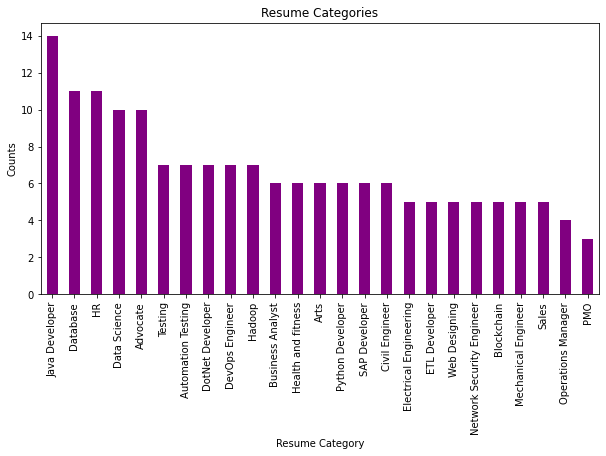

In [25]:
data["Category"].value_counts().plot(kind='bar', figsize = ((10,5)), color = 'purple',title='Resume Categories')
plt.xlabel("Resume Category")
plt.ylabel("Counts")
plt.show()

In [26]:
def clean(text):
    regex = re.compile('[' + re.escape(string.punctuation) + '0-9\\r\\t\\n]')
    text = regex.sub(" ", text.lower())
    words = text.split(" ")
    words = [re.sub('\S*@\S*\s?', '', sent) for sent in words]
    words = [re.sub('\s+', ' ', sent) for sent in words]
    words = [re.sub("\'", "", sent) for sent in words]
    words = [w for w in words if not len(w) < 2]
    words = [lmtzr.lemmatize(w) for w in words]
    
    return words

In [27]:
docs = data['Resume'].values

**Document-Term Matrix**

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', 
max_features= 1000, # keep top 1000 terms 
max_df = 0.5, 
smooth_idf=True)

X = vectorizer.fit_transform(docs)

X.shape # check shape of the document-term matrix

(169, 1000)

**Create an LSA model**

In [29]:
from sklearn.decomposition import TruncatedSVD

# SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)

svd_model.fit(X)

len(svd_model.components_)

20

**Determine the number of topics**

In [30]:
terms = vectorizer.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t)

Topic 0: 
('year', 0.18437025162244844)
('data', 0.17876118477930425)
('java', 0.16374927954171734)
('january', 0.156335074807552)
('database', 0.15371499884771747)
('sql', 0.13915399416669655)
('management', 0.1255749057456668)
Topic 1: 
('year', 0.31469249787564835)
('java', 0.23247266145395593)
('january', 0.20117719038996487)
('pune', 0.1382951270213306)
('ajax', 0.1203868203533714)
('college', 0.11362881076763973)
('university', 0.11052532113272058)
Topic 2: 
('java', 0.26784071776022433)
('database', 0.16632886502666142)
('data', 0.1447261601347354)
('hadoop', 0.1409229697923689)
('ajax', 0.13870594880077025)
('jquery', 0.1293568417708836)
('sql', 0.12774912959247234)
Topic 3: 
('data', 0.40635676281064764)
('hadoop', 0.3645675288092015)
('hive', 0.2799205910623164)
('year', 0.16067167782799044)
('sqoop', 0.14813137001692414)
('python', 0.1480309632254784)
('hdfs', 0.14583769204145988)
Topic 4: 
('database', 0.3095173777094538)
('server', 0.18866499026756856)
('oracle', 0.1518701

Cons:
- Since it is a linear model, it might not do well on datasets with non-linear dependencies.
- LSA assumes a Gaussian distribution of the terms in the documents, which may not be true for all problems.
- LSA involves SVD, which is computationally intensive and hard to update as new data comes up.